In [1]:
import pandas as pd
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('loan.csv')

C:\Users\akhil\AppData\Local\Temp/ipykernel_15972/129683778.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [145]:
## convert data type to float from object
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))

In [146]:
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [69]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [154]:
df.grade.value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [157]:
df[['loan_status','grade','member_id']].groupby(['loan_status','grade']).count()

member_id
loan_status grade           
Charged Off A            602
            B           1425
            C           1347
            D           1118
            E            715
            F            319
            G            101
Current     A             40
            B            345
            C            264
            D            222
            E            179
            F             73
            G             17
Fully Paid  A           9443
            B          10250
            C           6487
            D           3967
            E           1948
            F            657
            G            198

In [158]:
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [162]:
df[['loan_status','home_ownership','member_id']].groupby(['loan_status','home_ownership']).count()

member_id
loan_status home_ownership           
Charged Off MORTGAGE             2327
            OTHER                  18
            OWN                   443
            RENT                 2839
Current     MORTGAGE              638
            OWN                    83
            RENT                  419
Fully Paid  MORTGAGE            14694
            NONE                    3
            OTHER                  80
            OWN                  2532
            RENT                15641

<Axes: xlabel='home_ownership'>

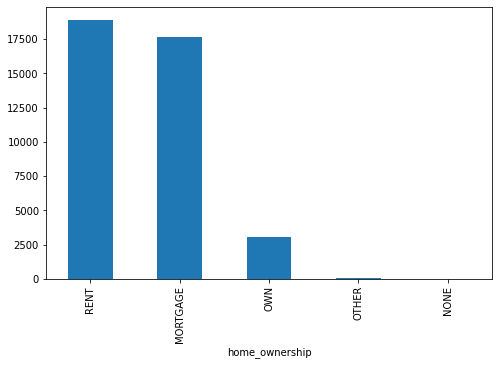

In [167]:
df_v2['home_ownership'].value_counts().plot.bar(x='hoam_ownership', figsize=(8, 5))

In [163]:
df['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [164]:
df[['loan_status','verification_status','member_id']].groupby(['loan_status','verification_status']).count()

member_id
loan_status verification_status           
Charged Off Not Verified              2142
            Source Verified           1434
            Verified                  2051
Current     Not Verified               227
            Source Verified            310
            Verified                   603
Fully Paid  Not Verified             14552
            Source Verified           8243
            Verified                 10155

<Axes: xlabel='verification_status'>

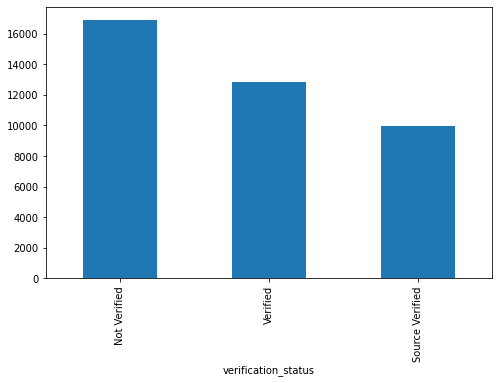

In [165]:
df_v2['verification_status'].value_counts().plot.bar(x='verification_status', figsize=(8, 5))

In [152]:
## find the duplicate in the whole dataset
df.duplicated().sum()

0

In [153]:
## find the duplicate members in the dataset
df['member_id'].duplicated().sum()

0

In [6]:
df.shape

(39717, 111)

In [7]:
df.acc_now_delinq.unique()

array([0], dtype=int64)

In [8]:
df.acc_open_past_24mths.unique()

array([nan])

In [15]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [23]:
df[['funded_amnt','funded_amnt_inv','installment']].corr()

,funded_amnt,funded_amnt_inv,installment
funded_amnt,1.000000,0.958422,0.956159
funded_amnt_inv,0.958422,1.000000,0.905039
installment,0.956159,0.905039,1.000000


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum().sum()/len(df)

56.98733539794043

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [75]:
missing_value_df[missing_value_df['column_name']=='emp_length']

,column_name,percent_missing
emp_length,emp_length,2.70665


In [80]:
## filter the column with greater than 3% null values
df_v1 = missing_value_df[missing_value_df['percent_missing']<3]

In [81]:
df_v1 = missing_value_df[missing_value_df['percent_missing']<3]

In [82]:
col = df_v1.index

In [83]:
col

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [84]:
df_v2 = df[col]

In [85]:
df.shape

(39717, 111)

In [86]:
df_v2.shape

(39717, 52)

In [87]:
col1= df_v2.dtypes

In [88]:
categorical = col[col1=='object']

In [89]:
categorical

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [90]:
df_categorical = df_v2[categorical]

In [91]:
df_categorical.head(10)

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,n,...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,May-16,INDIVIDUAL
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,28.30%,f,Jan-15,Jan-16,INDIVIDUAL
6,60 months,15.96%,C,C5,8 years,RENT,Not Verified,Dec-11,Fully Paid,n,...,debt_consolidation,Loan,280xx,NC,Jul-05,85.60%,f,May-16,May-16,INDIVIDUAL
7,36 months,18.64%,E,E1,9 years,RENT,Source Verified,Dec-11,Fully Paid,n,...,car,Car Downpayment,900xx,CA,Jan-07,87.50%,f,Jan-15,Dec-14,INDIVIDUAL
8,60 months,21.28%,F,F2,4 years,OWN,Source Verified,Dec-11,Charged Off,n,...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-04,32.60%,f,Apr-12,Aug-12,INDIVIDUAL
9,60 months,12.69%,B,B5,< 1 year,RENT,Verified,Dec-11,Charged Off,n,...,other,Building my credit history.,774xx,TX,Sep-04,36.50%,f,Nov-12,Mar-13,INDIVIDUAL


In [92]:
numerical = col[col1!='object']

In [93]:
numerical

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [94]:
df_numerical = df_v2[numerical]

In [95]:
df_numerical.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,...,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


In [96]:
df_v2.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [97]:
# import matplotlib as pieplot
import matplotlib.pyplot as plt

In [98]:
# Import libraries
from matplotlib import pyplot as plt

In [99]:
df_v2['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

<Axes: ylabel='count'>

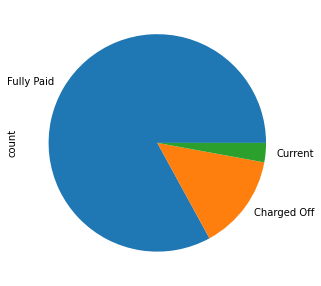

In [54]:
df_v2['loan_status'].value_counts().plot.pie(y='loan_status', figsize=(5, 5))

In [100]:
df_numerical.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.016346,NaN


In [113]:
df_numerical_v1= df_numerical.drop(['policy_code','acc_now_delinq','delinq_amnt','member_id','id','chargeoff_within_12_mths','tax_liens'], axis=1)

In [59]:
df_numerical_v1.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,...,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,...,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,...,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,...,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,...,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,...,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212
delinq_2yrs,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,...,-0.003008,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,...,-0.012106,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,0.000172,...,0.028688,0.028514,0.162663,0.152937,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.007463,0.024802,0.000172,1.000000,...,-0.012675,-0.012910,-0.053668,-0.054101,-0.065384,-0.007470,-0.002071,-0.005521,-0.005536,-0.032214


In [102]:
df_numerical_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   installment              39717 non-null  float64
 4   annual_inc               39717 non-null  float64
 5   dti                      39717 non-null  float64
 6   delinq_2yrs              39717 non-null  int64  
 7   inq_last_6mths           39717 non-null  int64  
 8   open_acc                 39717 non-null  int64  
 9   pub_rec                  39717 non-null  int64  
 10  revol_bal                39717 non-null  int64  
 11  total_acc                39717 non-null  int64  
 12  out_prncp                39717 non-null  float64
 13  out_prncp_inv            39717 non-null  float64
 14  total_pymnt           

In [103]:
df_numerical_v1.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,15000.00000,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,15000.00000,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,14400.00000,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,430.78000,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,82300.00000,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,18.60000,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.00000,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.00000,8.000000e+00
open_acc,39717.0,9.294408,4.400282,2.00,6.00,9.000000,12.00000,4.400000e+01
pub_rec,39717.0,0.055065,0.237200,0.00,0.00,0.000000,0.00000,4.000000e+00


In [42]:
pip install plotly

  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [104]:
df_v2.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

<Axes: xlabel='emp_length'>

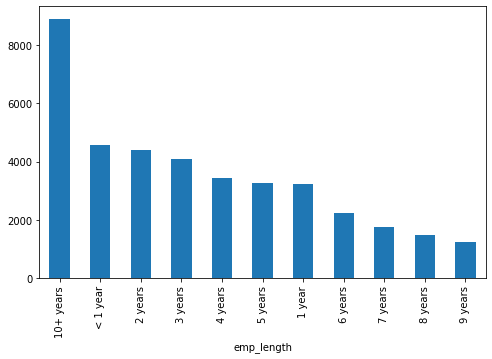

In [112]:
df_v2['emp_length'].value_counts().plot.bar(x='emp_length', figsize=(8, 5))

<Axes: >

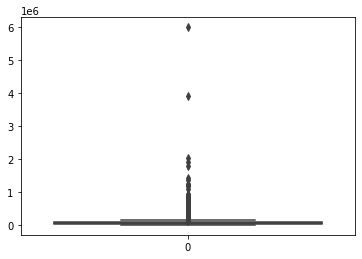

In [117]:
sns.boxplot(df_numerical['annual_inc'])

<Axes: >

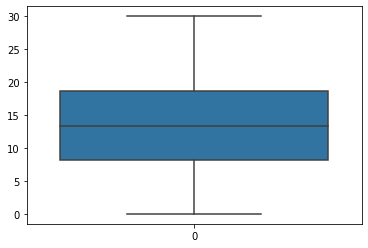

In [119]:
sns.boxplot(df_numerical.dti)

In [123]:
df_numerical['dti'].quantile([.1,.25,.50,.75])

0.10     4.08
0.25     8.17
0.50    13.40
0.75    18.60
Name: dti, dtype: float64

In [131]:
IQR = 13.40-8.17
IQR

5.23

In [132]:
lowerbound = 8.17-(1.5*5.23)
upperbound = 18.60+(1.5*5.23)

In [143]:
lowerbound

0.3249999999999993

In [144]:
upperbound

26.445

In [142]:
dti_outlier = df_numerical[(df_numerical['dti']<lowerbound) | (df_numerical['dti']>upperbound)]

<Axes: xlabel='dti'>

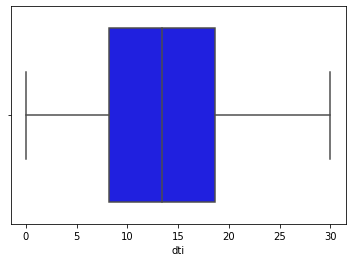

In [168]:
sns.boxplot(x=df_numerical['dti'],orient='h',color='blue')

In [ ]:
#z-score ##outlier treatment

In [171]:
sns.barplot(x='loan_status',y='dti',data=df_categorical)
# sns.countplot(x='loan_status',data=df_categorical)

ValueError: Could not interpret input 'dti'